In [2]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.261-b12, mixed mode)
  Starting server from C:\Users\minet\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\minet\AppData\Local\Temp\tmpyzi_qqdo
  JVM stdout: C:\Users\minet\AppData\Local\Temp\tmpyzi_qqdo\h2o_Paul_started_from_python.out
  JVM stderr: C:\Users\minet\AppData\Local\Temp\tmpyzi_qqdo\h2o_Paul_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_Paul_5w96ki
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.547 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [4]:
data = h2o.import_file("http://coursera.h2o.ai/cacao.882.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
train, valid, test = data.split_frame ([0.7,0.15], seed=100)

In [6]:
print("%d/%d/%d" % (train.nrows, valid.nrows, test.nrows))

1271/246/278


In [7]:
data

Maker,Origin,REF,Review Date,Cocoa Percent,Maker Location,Rating,Bean Type,Bean Origin
A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Â,Sao Tome
A. Morin,Kpime,1676,2015,0.7,France,2.75,Â,Togo
A. Morin,Atsane,1676,2015,0.7,France,3,Â,Togo
A. Morin,Akata,1680,2015,0.7,France,3.5,Â,Togo
A. Morin,Quilla,1704,2015,0.7,France,3.5,Â,Peru
A. Morin,Carenero,1315,2014,0.7,France,2.75,Criollo,Venezuela
A. Morin,Cuba,1315,2014,0.7,France,3.5,Â,Cuba
A. Morin,Sur del Lago,1315,2014,0.7,France,3.5,Criollo,Venezuela
A. Morin,Puerto Cabello,1319,2014,0.7,France,3.75,Criollo,Venezuela
A. Morin,Pablino,1319,2014,0.7,France,4,Â,Peru


Baseline Model: Test Results: MSE 0.216, Time: 6.16s, Cores:8, Memory: 3.547 Gb

In [8]:
y = "Rating"
ignoreFields = ["REF"]
xNoRef = [i for i in train.names if i not in ignoreFields]

In [9]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [10]:
m_DLR_def = H2ODeepLearningEstimator(variable_importances = True)
%time m_DLR_def.train(xNoRef, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 6.16 s


In [11]:
m_DLR_def.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.1681379762792259
RMSE: 0.41004630992026486
MAE: 0.3304987811360234
RMSLE: 0.10090869766320032
Mean Residual Deviance: 0.1681379762792259


In [12]:
m_DLR_def.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.21697011430656116
RMSE: 0.46580050913085225
MAE: 0.3821889424175001
RMSLE: 0.11631169156745491
Mean Residual Deviance: 0.21697011430656116


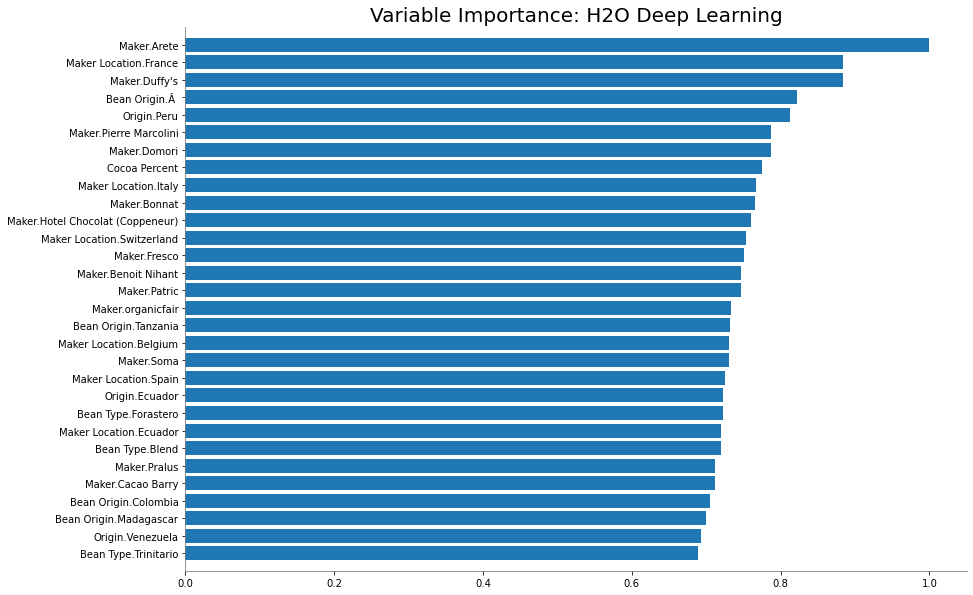

In [13]:
m_DLR_def.varimp_plot(30)

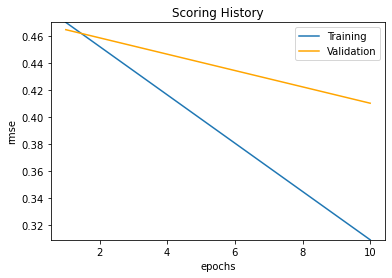

In [14]:
m_DLR_def.plot()

In [15]:
#Saving model to disk
model_path = h2o.save_model(model=m_DLR_def, path="D:/minet/H2o Course", force=True)
print (model_path)

D:\minet\H2o Course\DeepLearning_model_python_1596824172834_1


New Model

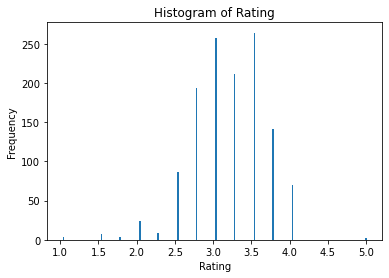

In [16]:
train[y].hist(200)

In [18]:
train.structure()

H2OFrame: 'py_2_sid_8ab6' 
Dimensions: 1271 obs. of 9 variables
$ Maker          :  Factor w/ 415 level(s) "A. Morin","AMMA","Acalli","Adi","Aequare (Gianduja)","Ah Cacao","Akesson's (Pralus)","Alain Ducasse","Alexandre","Altus aka Cao Artisan","Amano","Amatller (Simon Coll)","Amazona","Ambrosia","Amedei","Anahata","Animas","Ara","Arete","Artisan du Chocolat","Artisan du Chocolat (Casa Luker)","Askinosie","Bahen & Co.","Bakau","Bar Au Chocolat","Baravelli's","Batch","Beau Cacao","Beehive","Belcolade","Bellflower","Belyzium","Benoit Nihant","Bernachon","Beschle (Felchlin)","Bisou","Bittersweet Origins","Black Mountain","Black River (A. Morin)","Blanxart","Blue Bandana","Bonnat","Bouga Cacao (Tulicorp)","Bowler Man","Brasstown aka It's Chocolate","Brazen","Breeze Mill","Bright","Britarev","Bronx Grrl Chocolate","Burnt Fork Bend","C-Amaro","Cacao Arabuco","Cacao Atlanta","Cacao Barry","Cacao Hunters","Cacao Market","Cacao Prieto","Cacao Sampaka","Cacao Store","Cacao de Origen","Cacao de O

New Model: Test Results: MSE 0.213, Time: 2.57s, Cores:8, Memory: 3.547 Gb. Used stopping rounds to not overfit

In [17]:
y = "Rating"
ignoreFields = ["REF", "Origin", "Maker"]
xNo2 = [i for i in train.names if i not in ignoreFields]

In [43]:
m_DLR_2 = H2ODeepLearningEstimator(
            variable_importances = True,
            epochs = 18,
            stopping_rounds = 6, 
            stopping_tolerance = 1e-1, 
            #stopping_metric = "deviance",
            #distribution = "laplace"
            )
%time m_DLR_2.train(xNo2, y, train, validation_frame= valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 2.57 s


In [44]:
m_DLR_2.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.16426184423489548
RMSE: 0.40529229481313295
MAE: 0.3268054478184491
RMSLE: 0.1007039850735765
Mean Residual Deviance: 0.16426184423489548


In [45]:
m_DLR_2.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.21397003794329617
RMSE: 0.4625689547984129
MAE: 0.37947920583111827
RMSLE: 0.11607702064710444
Mean Residual Deviance: 0.21397003794329617


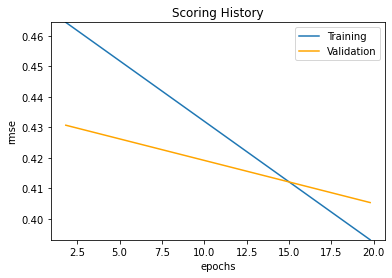

In [46]:
m_DLR_2.plot()

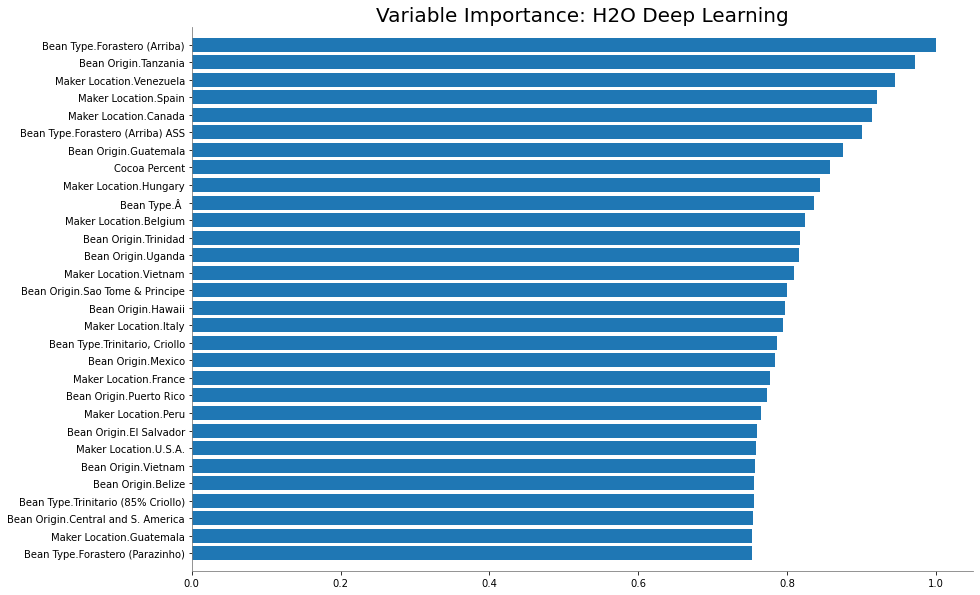

In [47]:
m_DLR_2.varimp_plot(30)

In [48]:
#Saving model to disk
model_path = h2o.save_model(model=m_DLR_2, path="D:/minet/H2o Course", force=True)
print (model_path)

D:\minet\H2o Course\DeepLearning_model_python_1596824172834_10


In [50]:
h2o.h2o.shutdown(prompt = True)

<ipython-input-50-cd8b81f5e7bf>:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.h2o.shutdown(prompt = True)


Are you sure you want to shutdown the H2O instance running at http://127.0.0.1:54321 (Y/N)? Y
H2O session _sid_8753 closed.
